In [3]:
from pipeline.query_engine_component import QueryExecutorStep

### HOW TO SET UP THE QUERY EXECUTOR
- Use milleniumDB for the engine name
- Write just the name of the rdf file as it is in the data folder!
- When mdb reads a file, it creates its own graph folder in mdb_graph_loads. To use a graph load, simply use the same graph path as you would normally, but set construct_graph = False.

In [4]:
# Initialize the QueryExecutorStep with the MillenniumDB engine, construct the graph from the path first.
query_executor = QueryExecutorStep(engine_name = "milleniumDB", graph_path="rdf_400_sphn.nt"
, construct_graph=False)

Checking available images...
['mdb:latest']
['docker-aseprite:latest']
['ghcr.io/avantlab/avantgraph:openaire-transport']
['ghcr.io/avantlab/avantgraph:openaire-energy']
['ghcr.io/avantlab/avantgraph:openaire-neuro']
['ghcr.io/avantlab/avantgraph:openaire-cancer']
['hello-world:latest']
['ghcr.io/avantlab/avantgraph:ckg']
['ghcr.io/avantlab/avantgraph:release-2024-01-31']


### Querying the engine
Now, when you have constructed the executor component, it will have started a docker container in which it is running the server:

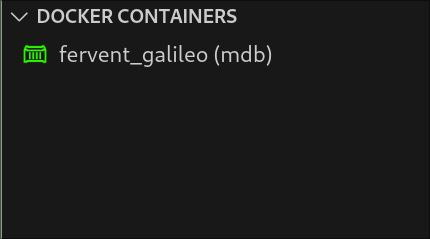

You can access this in one of two ways:
- go to http://localhost:4321. This will bring you to the MDB web page interface where you can test queries.
- Run queries through code as shown below:


In [5]:
# If a query is executable, this will return a list of dictionaries that contain
# results. 


# set path = False to give a query as a string directly.
example = query_executor.query("""
                     SELECT *
WHERE { ?s ?p ?o . }
LIMIT 100
""", path=False).data()
print("Example query results:")
for item in example:
    print(item)


>>> Query being sent to MillenniumDB:
 
                     SELECT *
WHERE { ?s ?p ?o . }
LIMIT 100

Example query results:
{'s': IRI<https://www.biomedit.ch/rdf/sphn-schema/sphn/DrugPrescription/20/patients/17349828/Drug>, 'p': IRI<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>, 'o': IRI<https://www.biomedit.ch/rdf/sphn-schema/sphn/Drug>}
{'s': IRI<https://www.biomedit.ch/rdf/sphn-schema/sphn/DrugPrescription/20/patients/17349828/Drug>, 'p': IRI<https://www.biomedit.ch/rdf/sphn-schema/sphn/hasActiveIngredient>, 'o': IRI<https://www.biomedit.ch/rdf/sphn-schema/sphn/DrugPrescription/20/patients/17349828/Substance>}
{'s': IRI<https://www.biomedit.ch/rdf/sphn-schema/sphn/DrugPrescription/67/patients/11072440/Drug>, 'p': IRI<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>, 'o': IRI<https://www.biomedit.ch/rdf/sphn-schema/sphn/Drug>}
{'s': IRI<https://www.biomedit.ch/rdf/sphn-schema/sphn/DrugPrescription/67/patients/11072440/Drug>, 'p': IRI<https://www.biomedit.ch/rdf/sphn-schema/sphn/h

### Queries that are not executable
If a query is not executable, the code will throw an MilleniumDBError. The error will also say what it thinks is wrong with the query. Example below.

In [6]:
# if a query is not executable, this will return an error message.
error = query_executor.query("""
                     SELECT *.
WHERE { ?s ?p ?o . }
""", path=False)

>>> Query being sent to MillenniumDB:
 
                     SELECT *.
WHERE { ?s ?p ?o . }



ResultError: 

When you're done with the code, you have a server and docker container running. It should be closed. You can do it as follows:

In [13]:
query_executor.close()

That's it :)